In [7]:
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt

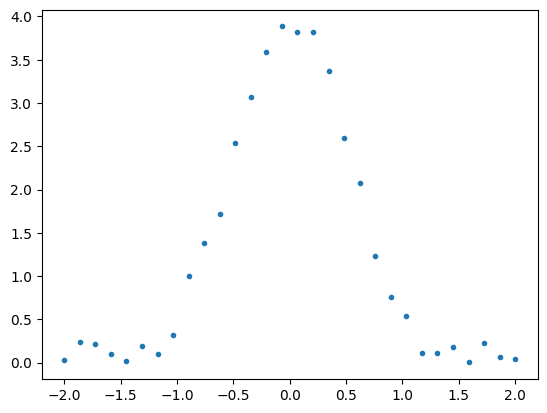

In [8]:
x = np.arange(-2,2+4/30,4/29)
y = np.array([0.031, 0.242, 0.215, 0.094, 0.014, 0.187, 0.101, 0.316, 1.000,
    1.386, 1.718, 2.533, 3.066, 3.593, 3.884, 3.816, 3.824, 3.366,
    2.594, 2.074, 1.232, 0.753, 0.533, 0.112, 0.114, 0.175, 0.001, 0.225,
    0.070, 0.044])
plt.plot(x,y,'.')

In [9]:
# a) The data seems to be a Gaussian function (normal distribution)
# f(x) = a * e^(-([(x-b)^2]/[2*c^2])) => 3 parameters
# a is the amplitude
# b is the mean
# c is the standard deviation

# b) The objective function should be min sum(y - f(x, a, b, c))^2, since the least squares optimization 
# is used to minimize the sum of squared errors

# c) reasonable initial guesses:
# a is the max y value shown the peak of the bell
# b is the x value for where the max y value is
# c is the the estimated width of hte bell curve. seems a a third of the range of x values as the plot 
#     seems symmetric

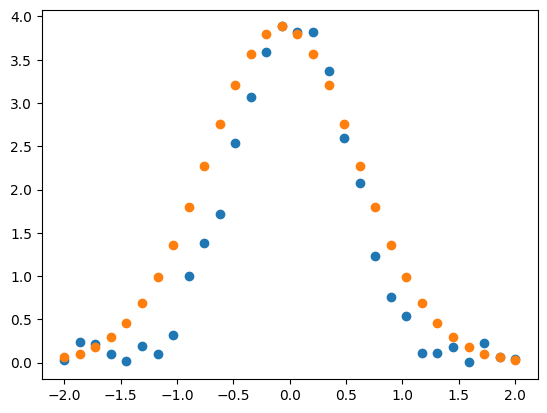

In [10]:
a0 = np.max(y)
b0 = x[np.argmax(y)]
c0 = (x[-1] - x[0])/3 * (1/2)

def gaussian(x, a, b, c):
    return a * np.exp(-((x - b) ** 2) / (2 * c ** 2))

y_guess = gaussian(x, a0, b0, c0)

plt.scatter(x, y)
plt.scatter(x, y_guess)

In [11]:
a0, b0, c0

(3.884, -0.06896551724137856, 0.666666666666667)

[3.98845406 0.01449157 0.50648336] 0.4364980729869399


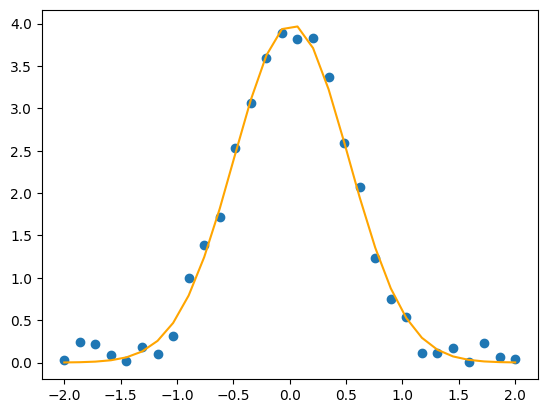

In [12]:
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt

# Define the Gaussian function
def gaussian(x, a, b, c):
    return a * np.exp(-((x - b) ** 2) / (2 * c ** 2))

# Define the least squares objective function
def leastSquare(param, x, y):
    a, b, c = param
    # Calculate the residuals
    residual = y - gaussian(x, a, b, c)
    # Return the sum of the squares of the residuals
    return np.sum(residual**2)

# Given x and y data
x = np.arange(-2,2+4/30,4/29)
y = np.array([0.031, 0.242, 0.215, 0.094, 0.014, 0.187, 0.101, 0.316, 1.000,
              1.386, 1.718, 2.533, 3.066, 3.593, 3.884, 3.816, 3.824, 3.366,
              2.594, 2.074, 1.232, 0.753, 0.533, 0.112, 0.114, 0.175, 0.001, 0.225,
              0.070, 0.044])


initial_guess = [3, 0, 1] # Initial guess for the parameters
result = sp.minimize(leastSquare, initial_guess, args=(x,y))
fitted_param = result.x # value of the parameters

print(fitted_param, result.fun)

predict = [gaussian(x, *fitted_param) for x in x]

# Plot the fitted model
plt.scatter(x, y)
# plt.scatter(x, predict)
plt.plot(x, predict, color="orange")

In [15]:
def f(a, b):
    return np.sum((y - a * np.exp(b*x**2))**2)

def df(a, b):
    return np.array([[np.sum(-2*np.exp(b*x**2)*(y - a * np.exp(b*x**2)))],
                    [np.sum(-2 * a * np.exp(b * x **2) * x**2 * (y - a * np.exp(b*x**2)))]])
def d2f(a, b):
    return np.array([[np.sum(2 * np.exp(2 * b*x**2)), np.sum(2 * np.exp(b*x**2 )* x**2 * (y - 2 * a * np.exp(b*x**2)))],
                     [np.sum(2 * np.exp(b*x**2 )* x**2 * (y - 2 * a * np.exp(b*x**2))), np.sum(2 * a * np.exp(b*x**2) * x**4 * (y - 2 * a * np.exp(b*x**2)))]])